In [150]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Load metrics from results and save as single file.

In [151]:
metrics_path = 'metrics.csv'
results_folder = os.path.join('..' , '..', 'results')

In [152]:
df = pd.DataFrame()
for root, subdirs, files in os.walk(results_folder):
    for f in files:
        if f == 'metrics.csv':
            d = pd.read_csv(os.path.join(root,f))
            if 'PL' in root:
                d['lang'] = 'PL'
            elif 'ENG' in root:
                d['lang'] = 'ENG'
            df = df.append(d)
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)
df.to_csv(metrics_path, index=False)

Load file for analysis

In [153]:
df = pd.read_csv(metrics_path)
df.round(3)

,accuracy,f1,precision,recall,model,dataset_type,dataset_size,lang
0,0.952,0.910,0.930,0.890,bert-base-multilingual-uncased,cameras,large,ENG
1,0.939,0.887,0.895,0.880,bert-base-multilingual-uncased,cameras,medium,ENG
2,0.880,0.802,0.730,0.890,bert-base-multilingual-uncased,cameras,small,ENG
3,0.956,0.920,0.920,0.920,bert-base-multilingual-uncased,computers,large,ENG
4,0.941,0.895,0.871,0.920,bert-base-multilingual-uncased,computers,medium,ENG
5,0.925,0.860,0.870,0.850,bert-base-multilingual-uncased,computers,small,ENG
6,0.946,0.901,0.911,0.890,bert-base-multilingual-uncased,shoes,large,ENG
7,0.895,0.826,0.751,0.917,bert-base-multilingual-uncased,shoes,medium,ENG
8,0.849,0.766,0.664,0.903,bert-base-multilingual-uncased,shoes,small,ENG
9,0.962,0.929,0.939,0.920,bert-base-multilingual-uncased,watches,large,ENG


## Plots

In [154]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)

In [155]:
def encode_size(s):
    if s=='large':
        return 7
    elif s=='medium':
        return 3
    else:
        return 1


In [156]:
df['size'] = df['dataset_size'].apply(encode_size)

In [157]:
metrics_df = df[['f1', 'precision', 'recall']].melt(ignore_index=False, var_name='metric')
info_df = df[['model', 'size', 'dataset_size', 'dataset_type', 'lang']]
metrics_info_df = metrics_df.merge(info_df, left_index=True, right_index=True)

In [182]:
def plot_f1_prec_rec_for_model(data, model, model_label, bbox_anchor):
    f = (data['model']==model) 
    d = data[f].sort_values(by='size', ascending=False)
    g = sns.FacetGrid(d, col="metric", hue='dataset_type', height=3.5)
    g.map(sns.lineplot, 'size', 'value', legend=None)
    g.map(sns.scatterplot, 'size', 'value')
    g.set(xticks=[1,3,7])
    g.set(xticklabels=['small', 'medium', 'large'])
    ncol = data['dataset_type'].nunique()
    g.add_legend(title='Dataset type', ncol=ncol,
        loc='center', bbox_to_anchor=bbox_anchor,
        markerscale=2.0)
    plt.savefig(f'img/{model_label}_metrics.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

### Polish dataset

In [183]:
polish_df = metrics_info_df[metrics_info_df['lang'] == 'PL']

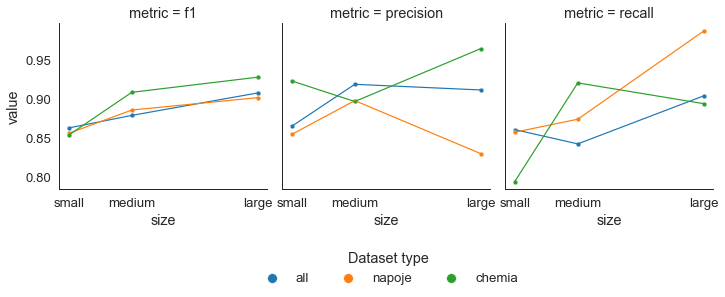

In [184]:
plot_f1_prec_rec_for_model(polish_df,'bert-base-multilingual-uncased', 'bert_PL', (0.41, -0.10))

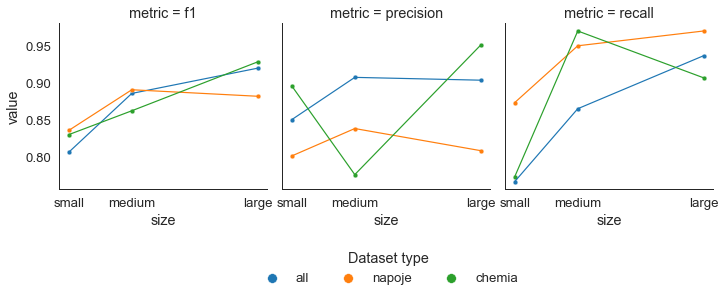

In [161]:
plot_f1_prec_rec_for_model(polish_df, 'xlm-roberta-base', 'XLM-RoBERTa_PL', (0.41, -0.10))

### English

In [162]:
english_df = metrics_info_df[metrics_info_df['lang'] == 'ENG']

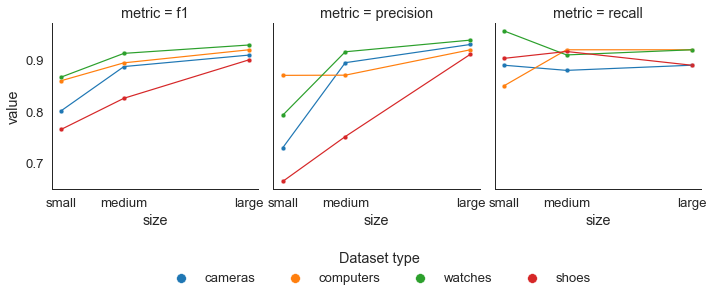

In [163]:
plot_f1_prec_rec_for_model(english_df,'bert-base-multilingual-uncased', 'bert_ENG', (0.355, -0.10))

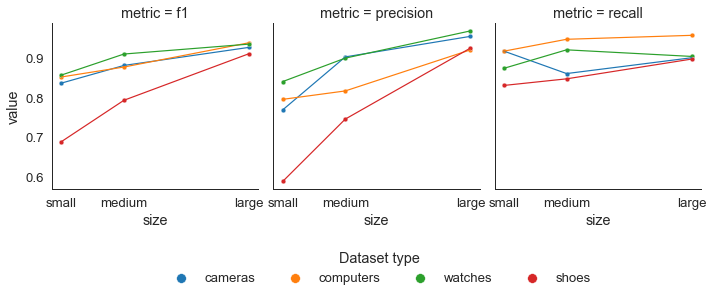

In [164]:
plot_f1_prec_rec_for_model(english_df, 'xlm-roberta-base', 'XLM-RoBERTa_ENG', (0.355, -0.10))

## Dataset sizes

In [165]:
wdc_sizes = pd.DataFrame([
    {'dataset_type':'cameras',      'dataset_size':'small',     'n': 1886},
    {'dataset_type':'cameras',      'dataset_size':'medium',    'n': 5255},
    {'dataset_type':'cameras',      'dataset_size':'large',     'n': 20036},
    {'dataset_type':'computers',    'dataset_size':'small',     'n': 2834},
    {'dataset_type':'computers',    'dataset_size':'medium',    'n': 8094},
    {'dataset_type':'computers',    'dataset_size':'large',     'n': 33359},
    {'dataset_type':'watches',      'dataset_size':'small',     'n': 2255},
    {'dataset_type':'watches',      'dataset_size':'medium',    'n': 6413},
    {'dataset_type':'watches',      'dataset_size':'large',     'n': 27027},
    {'dataset_type':'shoes',        'dataset_size':'small',     'n': 2063},
    {'dataset_type':'shoes',        'dataset_size':'medium',    'n': 5805},
    {'dataset_type':'shoes',        'dataset_size':'large',     'n': 22989},
])

In [208]:
def plot_f1_size(data, save):
    sns.scatterplot(x='n', y='f1', hue='model', data=data, s=30)
    plt.ylim(0.83,0.95)
    plt.ylabel('F1 score')
    plt.xlabel('Dataset size')
    sns.despine()
    plt.legend(title='Model',frameon=False, loc='center left', bbox_to_anchor=(1.02, 1))
    plt.savefig(f'img/{save}')

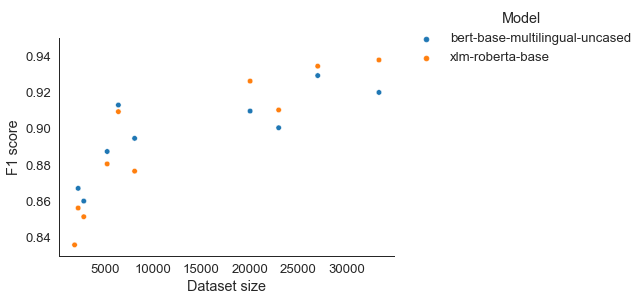

In [209]:
d = df[df['lang'] == 'ENG'].merge(wdc_sizes, on=['dataset_type', 'dataset_size'])
plot_f1_size(d, 'f1_size_eng.svg')
plt.show()

In [206]:
POLISH_DATASET_PATH = '../data/PolishDataset'
types = ['all_train', 'chemia_train', 'napoje_train']
sizes = []
for t in types:
    p = os.path.join(POLISH_DATASET_PATH, t)
    for root, subdirs, files in os.walk(p):
        for f in files:
            data = pd.read_json(os.path.join(root, f), compression='gzip', lines=True)
            name = f.replace('.json.gz', '').split('_')
            sizes.append({
                'dataset_type': name[2],
                'dataset_size': name[3],
                'n': len(data)
            })
sizes_pl_df = pd.DataFrame(sizes)
sizes_pl_df

,dataset_type,dataset_size,n
0,all,large,24752
1,all,medium,10608
2,all,small,3536
3,chemia,large,14084
4,chemia,medium,6036
5,chemia,small,2012
6,napoje,large,10668
7,napoje,medium,4572
8,napoje,small,1524


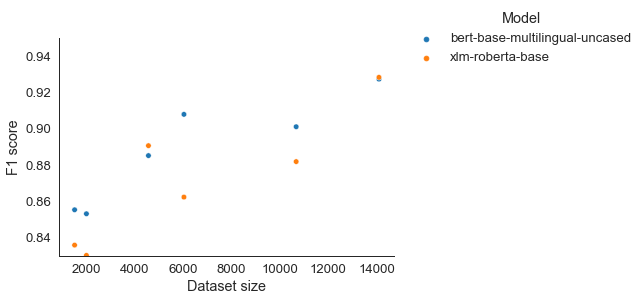

In [210]:
d = df[df['lang'] == 'PL'].merge(sizes_pl_df[~(sizes_pl_df['dataset_type'] == 'all')], on=['dataset_type', 'dataset_size'])
plot_f1_size(d, 'f1_size_pl.svg')
plt.show()
